# Quora Question Pair Similarity

<p style = 'font-size:17px'><b> Identifying Quora Question Pairs that have the same intent</b><br><br>
We will follow the steps mentioned below: <br>

1. Data Loading <br>
2. Analyze the data <br>
3. Data Preprocessing <br>
5. Split the data into train-test<br>
4. Data Preparation or Feature Engineering<br>
    <ul><li>Vectorize using BoW , Tf-Idf , Word2vec</li></ul><bbr>
5. Train the Model using ML Algorithm


# Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Dataset

## 1. Load the data

In [ ]:
df = pd.read_csv('quora')
df.head()

,Unnamed: 0,index,id,qid1,qid2,question1,question2,is_duplicate
0,0,8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0
1,1,368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0
2,2,70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0
3,3,226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1
4,4,73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1


In [ ]:
df.shape

(100000, 8)

In [ ]:
df.columns

Index(['Unnamed: 0', 'index', 'id', 'qid1', 'qid2', 'question1', 'question2',
       'is_duplicate'],
      dtype='object')

## 2. Analyze the data

In [ ]:
# As our task is to indentify duplicate questions, so we can consider only the follwing 3 columns

df = df.loc[:, ['question1', 'question2', 'is_duplicate']]

df.shape

(100000, 3)

In [ ]:
df.head()

,question1,question2,is_duplicate
0,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0
1,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0
2,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0
3,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1
4,How close we are to see 3rd world war?,How close is a World War III?,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   question1     100000 non-null  object
 1   question2     100000 non-null  object
 2   is_duplicate  100000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


# Checking for Missing value

In [ ]:
df.isnull().sum()

question1       0
question2       0
is_duplicate    0
dtype: int64

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

# 3. Data Preprocessing

<p style = 'font-size:17px'>   Preprocessing Steps --<br>
<ul>
<li>Remove special characters</li>
<li>Covert sentences into lower or upper case</li>
<li>Remove Stopwords</li>
<li>Stemming or Lemmatizing</li>
</ul></p>

In [ ]:
def preprocess(raw_ques, flag):
    
    # Removing special characters and digits
    only_words = re.sub("[^a-zA-Z]", " ",raw_ques)
    
    # Change sentence to lower case
    only_words = only_words.lower()
    
    # tokenize into words
    words = only_words.split()
    
    words_len.append(len(words))
    
    # remove stop words                
    words = [i for i in words if not i in stopwords.words("english")]
    
    #Stemming/Lemmatization
    
    stemmer = PorterStemmer()
    
    lemmatizer = WordNetLemmatizer()
    
    if(flag == 'stem'):
        words = [stemmer.stem(i) for i in words]
    else:
        words = [lemmatizer.lemmatize(i) for i in words]
        
        
    q_word_lst.append(" ".join(words))
    
    q_len_lst.append(len(words))

In [ ]:
from tqdm import tqdm, tqdm_notebook

tqdm.pandas()

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Stemming

In [ ]:
q_word_lst = []

q_len_lst = []

words_len = []

df['question1'].progress_apply(lambda x: preprocess(x, 'stem'))

df['question1_len'] = words_len

df['q1_stem'] = q_word_lst

df['q1_len_stem'] = q_len_lst

100%|██████████| 100000/100000 [02:31<00:00, 658.99it/s]


In [ ]:
q_word_lst = []

q_len_lst = []

words_len = []

df['question2'].progress_apply(lambda x: preprocess(x, 'stem'))

df['question2_len'] = words_len

df['q2_stem'] = q_word_lst

df['q2_len_stem'] = q_len_lst

100%|██████████| 100000/100000 [02:35<00:00, 645.10it/s]


In [ ]:
df.head()

,question1,question2,is_duplicate,question1_len,q1_stem,q1_len_stem,question2_len,q2_stem,q2_len_stem
0,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,9,play pok mon go korea,5,9,play pok mon go china,5
1,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,11,best side dish crab cake,5,9,good side dish buffalo chicken,5
2,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0,16,advis better materi crash test automobil ducti...,8,8,best server setup buddypress,4
3,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1,7,improv logic program skill,4,9,improv logic skill program,4
4,How close we are to see 3rd world war?,How close is a World War III?,1,9,close see rd world war,5,7,close world war iii,4


<p style='font-size:16px'> <b>Stemming </b>represents different variations of a word, say ‘like’, 'likely’, ‘liked,’  as a single token - ‘like’, because they all carry the same information. But it just removes or stems the last few characters of a word, often leading to incorrect meaning.</p>

## Lemmatizing
<p style='font-size:16px'><b>Lemmatization</b> considers the context and converts the word to its meaningful base form, which is called Lemma</p>

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
q_word_lst = []

q_len_lst = []

df['question1'].progress_apply(lambda x: preprocess(x, 'lemma'))

df['q1_lemma'] = q_word_lst

df['q1_len_lemma'] = q_len_lst

100%|██████████| 100000/100000 [02:20<00:00, 710.73it/s]


In [ ]:
q_word_lst = []

q_len_lst = []

df['question2'].progress_apply(lambda x: preprocess(x, 'lemma'))

df['q2_lemma'] = q_word_lst

df['q2_len_lemma'] = q_len_lst

100%|██████████| 100000/100000 [02:21<00:00, 707.42it/s]


In [ ]:
df.head()

,question1,question2,is_duplicate,question1_len,q1_stem,q1_len_stem,question2_len,q2_stem,q2_len_stem,q1_lemma,q1_len_lemma,q2_lemma,q2_len_lemma
0,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,9,play pok mon go korea,5,9,play pok mon go china,5,play pok mon go korea,5,play pok mon go china,5
1,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,11,best side dish crab cake,5,9,good side dish buffalo chicken,5,best side dish crab cake,5,good side dish buffalo chicken,5
2,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0,16,advis better materi crash test automobil ducti...,8,8,best server setup buddypress,4,advisable better material crash test automobil...,8,best server setup buddypress,4
3,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1,7,improv logic program skill,4,9,improv logic skill program,4,improve logical programming skill,4,improve logical skill programming,4
4,How close we are to see 3rd world war?,How close is a World War III?,1,9,close see rd world war,5,7,close world war iii,4,close see rd world war,5,close world war iii,4


# Exploratory Data Analysis

In [ ]:
dataset=df
dataset.columns

Index(['question1', 'question2', 'is_duplicate', 'question1_len', 'q1_stem',
       'q1_len_stem', 'question2_len', 'q2_stem', 'q2_len_stem', 'q1_lemma',
       'q1_len_lemma', 'q2_lemma', 'q2_len_lemma'],
      dtype='object')

## Top 50 Questions

In [ ]:
common=[]

for i in dataset['q1_lemma']:
    common.append(i)
    
for i in dataset['q2_lemma']:
    common.append(i)

#print(common)
dicttt=[]

for i in range(len(common)):
    dicttt.append((common[i],common.count(common[i])))

sorted(dicttt.items(), key=lambda x: (x[1],x[1]), reverse=True)
#print(dicttt)

In [ ]:
dictt=dict(dicttt)

In [ ]:
import operator
### Creating a common_words_sorted variable

common_words_sorted = dict(sorted(dictt.items(), key=operator.itemgetter(1),reverse=True))

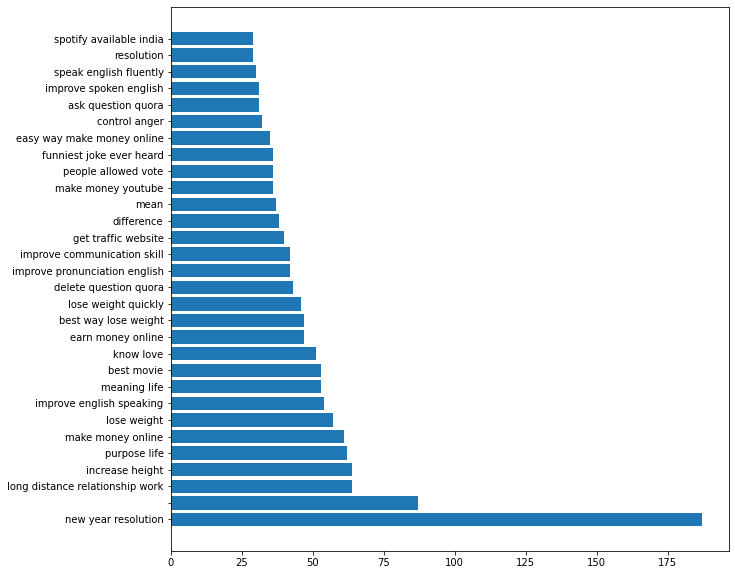

In [ ]:
D = {}
for i in range(30):
    D[list(common_words_sorted.keys())[i]]= list(common_words_sorted.values())[i]
plt.figure(figsize=(10,10))
plt.barh(*zip(*D.items()))
plt.show()

## Common Words between Question1 and Question2

In [ ]:

def common_words(q1, q2):  
    words = [i for i in q1 if i in q2]
    
    if len(words) == 0:
        words = []    
        
    return words

In [ ]:
same_words = []
same_words_len = []

for i, j in zip(dataset['q1_lemma'], dataset['q2_lemma']):
    words = common_words(i.split(), j.split())

    same_words.append(" ".join(words))
    same_words_len.append(len(words))
    
dataset['common_words'] = same_words
dataset['common_words_len'] = same_words_len

In [ ]:
print('Total no. of Common Words : ', sum(df['common_words_len']))

Total no. of Common Words :  270945


In [ ]:
d1=dataset

COMMON_WORDS=d1[['q1_lemma','q2_lemma','common_words','common_words_len']]

COMMON_WORDS.head()

,q1_lemma,q2_lemma,common_words,common_words_len
0,play pok mon go korea,play pok mon go china,play pok mon go,4
1,best side dish crab cake,good side dish buffalo chicken,side dish,2
2,advisable better material crash test automobil...,best server setup buddypress,,0
3,improve logical programming skill,improve logical skill programming,improve logical programming skill,4
4,close see rd world war,close world war iii,close world war,3


### Word Cloud 

In [ ]:
!pip install wordcloud

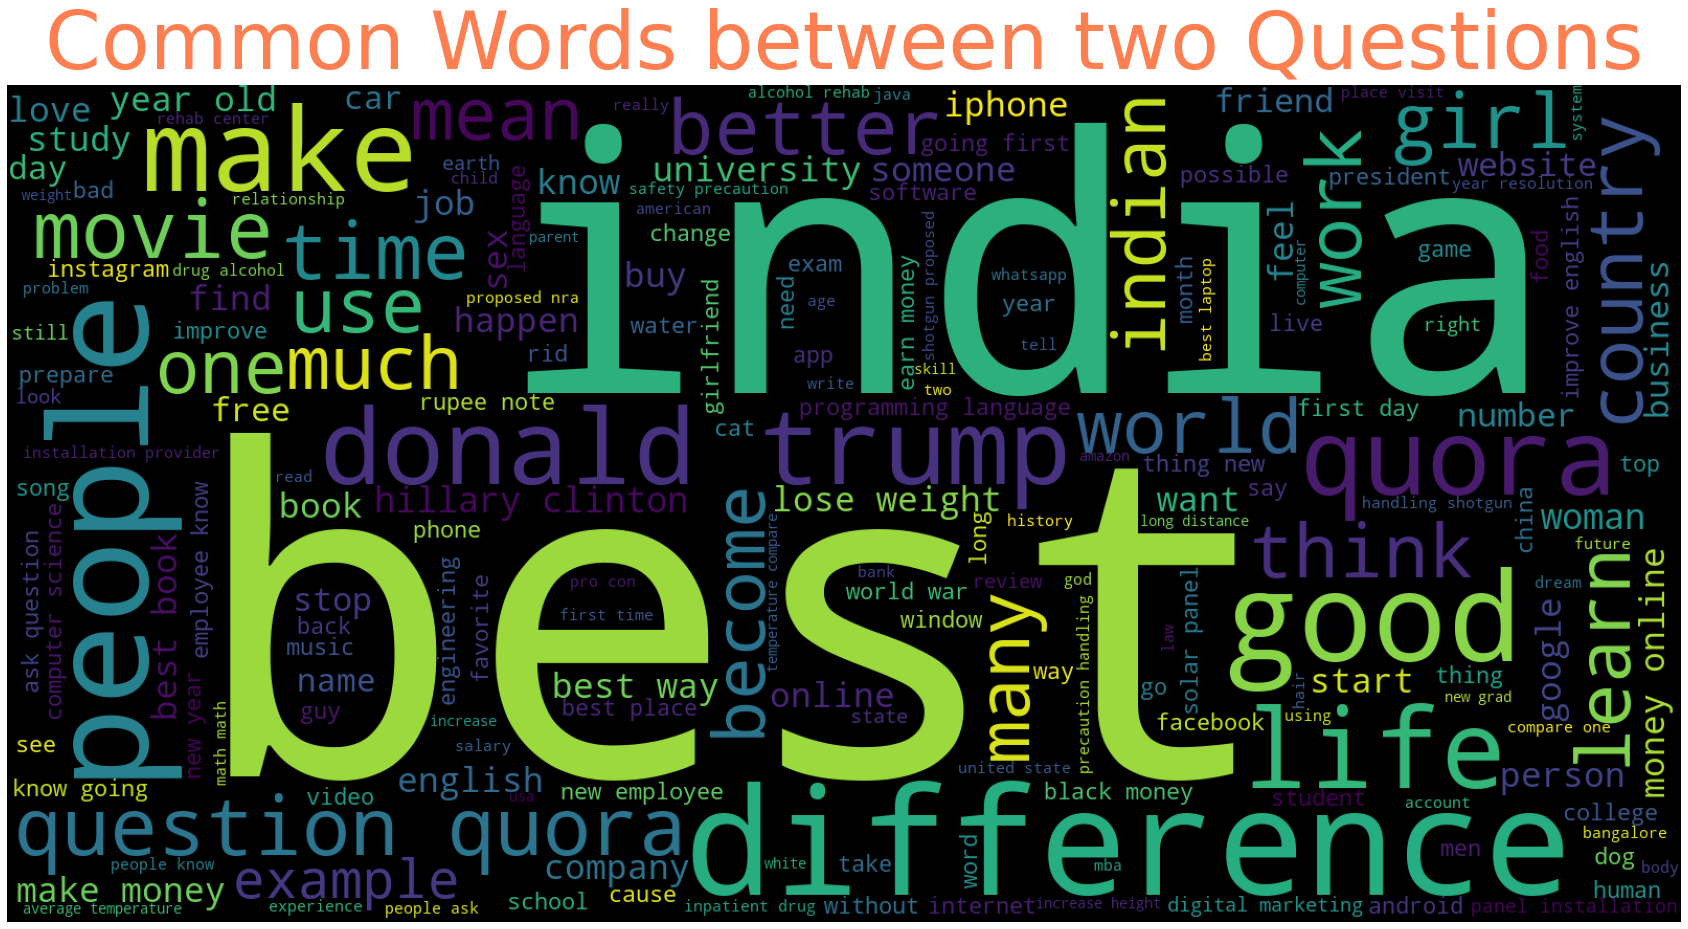

In [ ]:
from wordcloud import WordCloud, STOPWORDS
words = ' '.join(dataset['common_words'])
cleaned_word = " ".join([word for word in words.split()])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)
plt.figure(1,figsize=(30,20))
plt.title('Common Words between two Questions',fontsize=80,color='coral')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Univariate Analysis

### Is_Duplicate

#### Normal Distribution

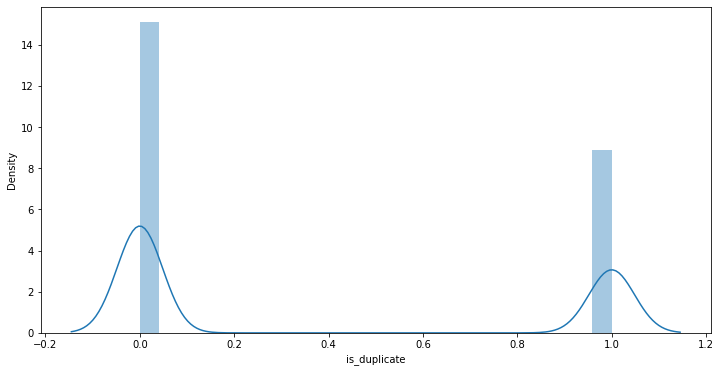


mean:  0.37121
median: 0.0
mode: 0    0
dtype: int64



In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(dataset['is_duplicate'])
plt.show()
print()
print('mean: ',dataset['is_duplicate'].mean())
print('median:',dataset['is_duplicate'].median())
print('mode:',dataset['is_duplicate'].mode())
print()

#### Count Plot

Total unique labels: 2


0    62879
1    37121
Name: is_duplicate, dtype: int64

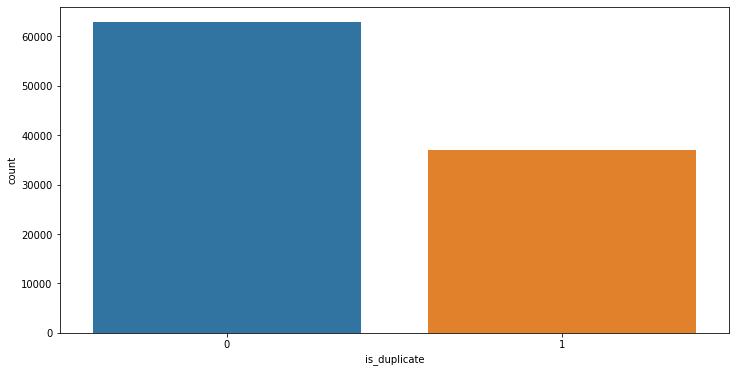

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(dataset['is_duplicate'])
print('Total unique labels:', dataset["is_duplicate"].nunique())

dataset['is_duplicate'].value_counts()

#### Pie Chart

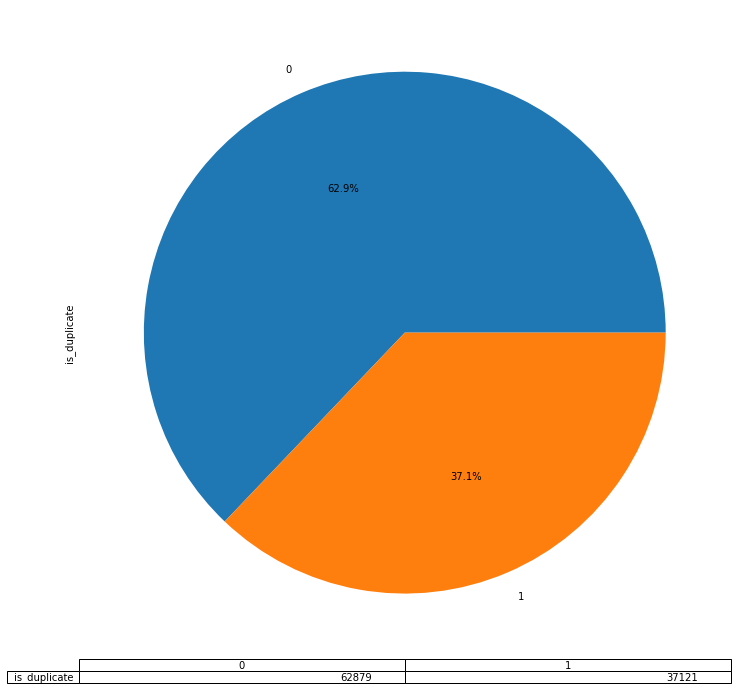

In [ ]:
plt.figure(figsize=(12,12))
dataset.is_duplicate.value_counts().plot(kind='pie', autopct='%1.1f%%', table = True)
plt.show()

#### Histogram

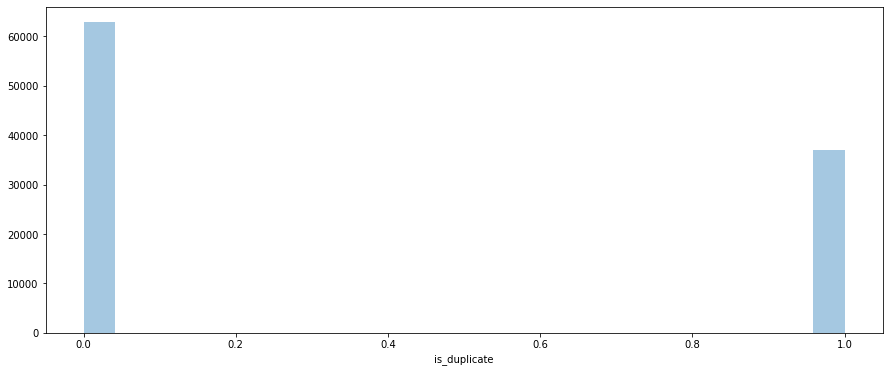

In [ ]:
plt.figure(figsize=(15,6))
sns.distplot(dataset['is_duplicate'],kde=False)
plt.show()

#### Box Plot

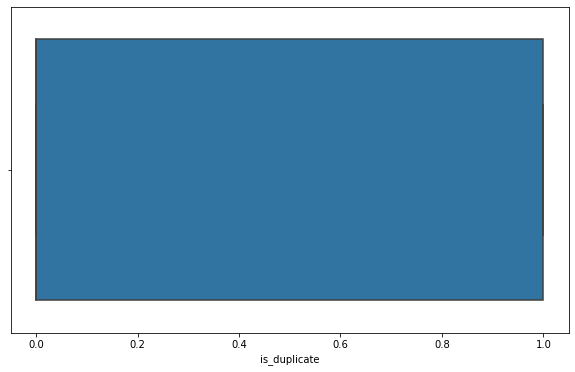

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(dataset['is_duplicate'])

### Q1_len

#### Normal Distribution

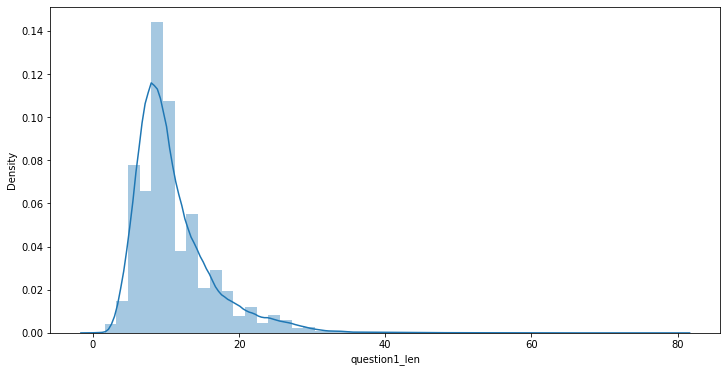


mean:  10.97986
median: 10.0
mode: 0    8
dtype: int64



In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(dataset['question1_len'])
plt.show()
print()
print('mean: ',dataset['question1_len'].mean())
print('median:',dataset['question1_len'].median())
print('mode:',dataset['question1_len'].mode())
print()

#### Count Plot

Total unique labels: 68


8     11783
9     11261
7     10561
10     9786
6      7775
      ...  
70        1
56        1
69        1
59        1
64        1
Name: question1_len, Length: 68, dtype: int64

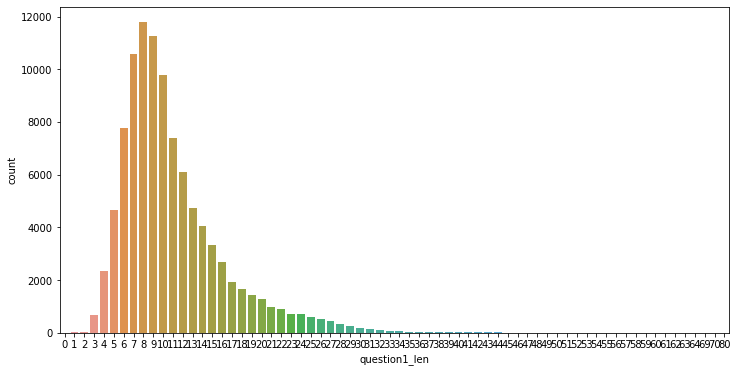

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(dataset['question1_len'])
print('Total unique labels:', dataset["question1_len"].nunique())

dataset['question1_len'].value_counts()

#### Pie Chart

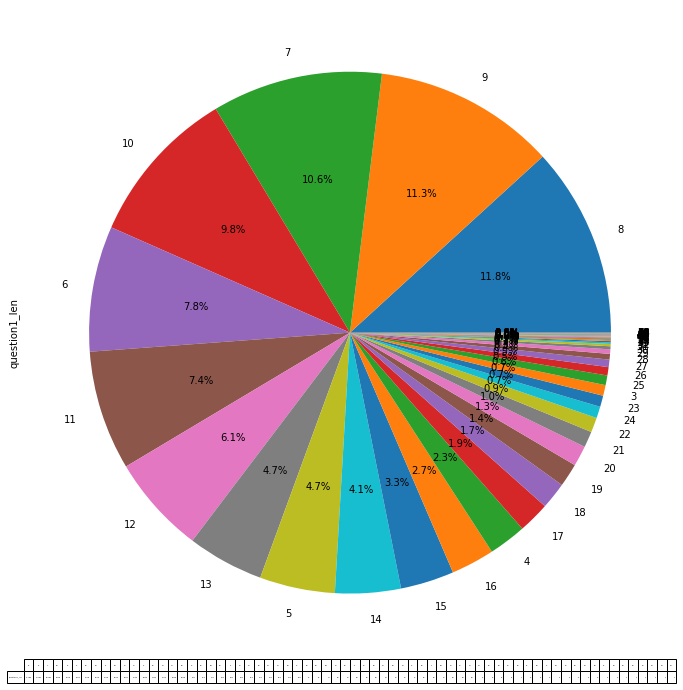

In [ ]:
plt.figure(figsize=(12,12))
dataset.question1_len.value_counts().plot(kind='pie', autopct='%1.1f%%', table = True)
plt.show()

#### Histogram

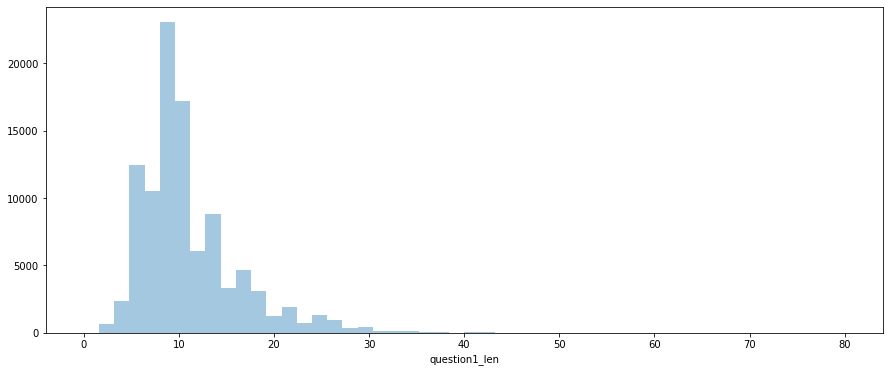

In [ ]:
plt.figure(figsize=(15,6))
sns.distplot(dataset['question1_len'],kde=False)
plt.show()

#### Boxplot

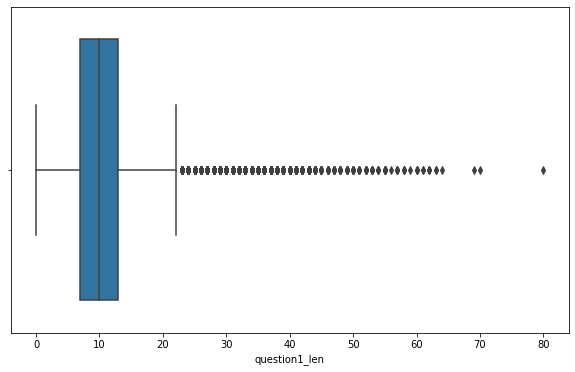

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(dataset['question1_len'])

### Q1_len_stem

#### Normal Distribution

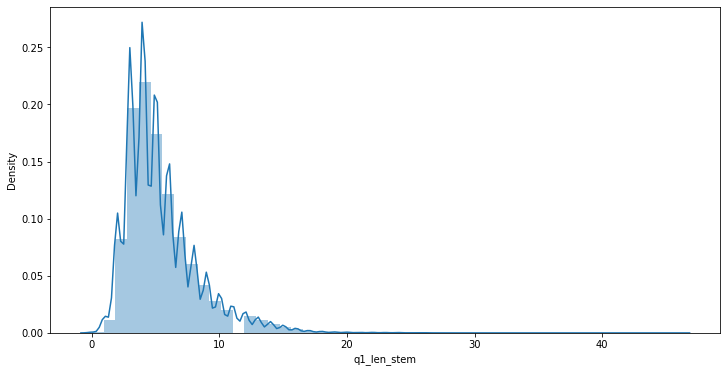


mean:  5.38437
median: 5.0
mode: 0    4
dtype: int64



In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(dataset['q1_len_stem'])
plt.show()
print()
print('mean: ',dataset['q1_len_stem'].mean())
print('median:',dataset['q1_len_stem'].median())
print('mode:',dataset['q1_len_stem'].mode())
print()

#### Count Plot

Total unique labels: 34


4     20173
3     18133
5     16034
6     11173
7      7730
2      7554
8      5529
9      3852
10     2545
11     1805
12     1376
1      1035
13     1010
14      714
15      486
16      296
17      156
18       96
19       60
0        47
20       47
21       32
22       31
23       23
24       22
26       12
25       11
28        5
30        5
27        3
34        2
42        1
31        1
46        1
Name: q1_len_stem, dtype: int64

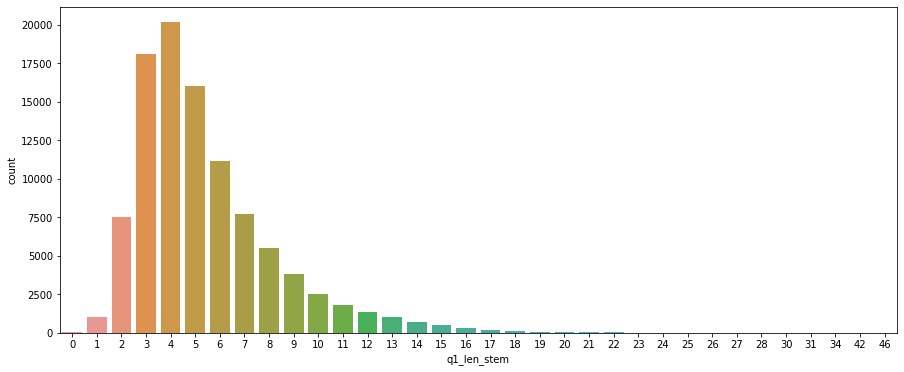

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(dataset['q1_len_stem'])
print('Total unique labels:', dataset["q1_len_stem"].nunique())

dataset['q1_len_stem'].value_counts()

#### Histogram

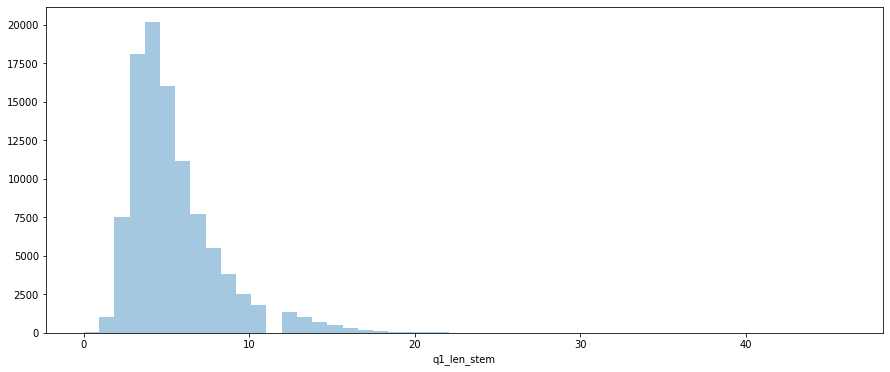

In [ ]:
plt.figure(figsize=(15,6))
sns.distplot(dataset['q1_len_stem'],kde=False)
plt.show()

#### Pie Chart

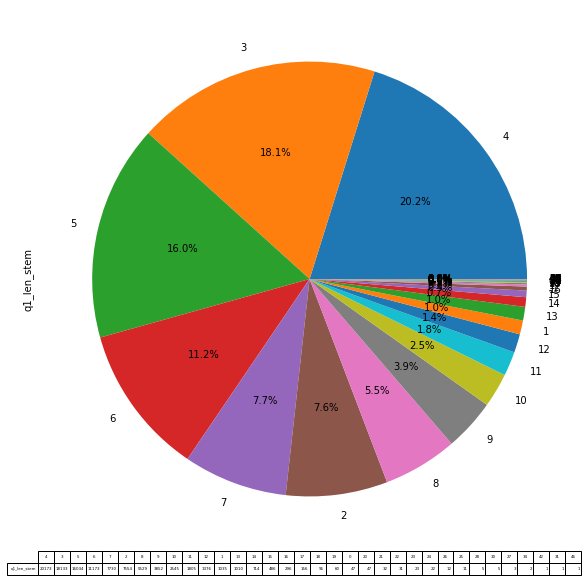

In [ ]:
plt.figure(figsize=(10,10))
dataset.q1_len_stem.value_counts().plot(kind='pie', autopct='%1.1f%%', table = True)
plt.show()

#### Boxplot

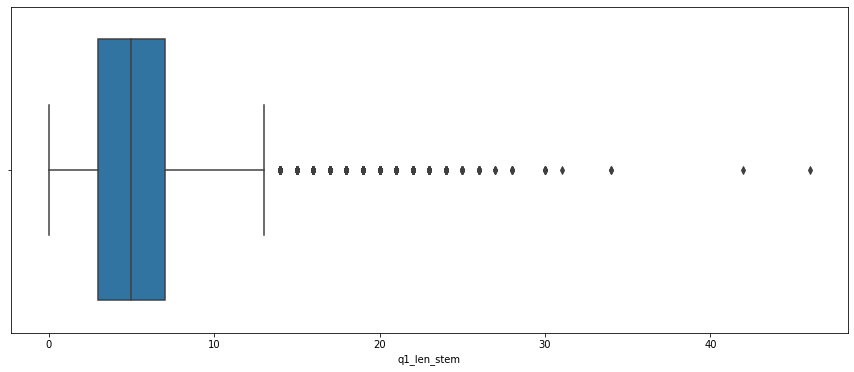

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(dataset['q1_len_stem'])

## Bivariate Analysis

### Pair Plot

In [ ]:
dq=dataset[['q1_stem','q2_stem','common_words','common_words_len','q1_len_stem','q2_len_stem','q1_len_lemma','q2_len_lemma','is_duplicate']]

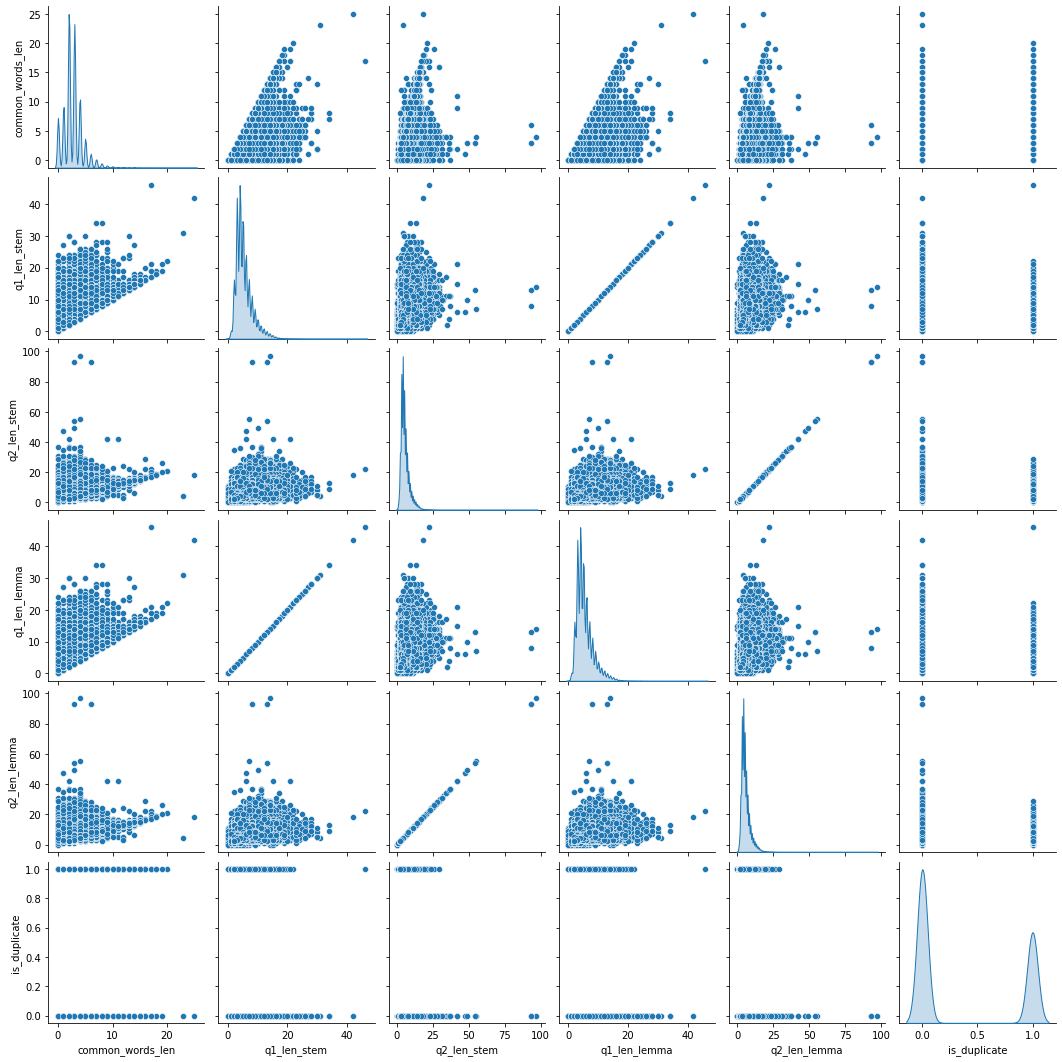

In [ ]:
sns.pairplot(dq,diag_kind='kde')

### Hexbin Plot

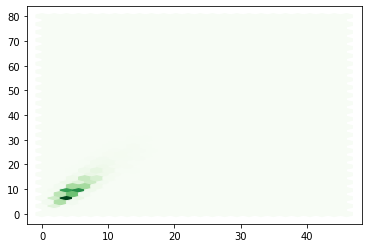

In [ ]:
plt.hexbin(x = dataset['q1_len_stem'], y = df['question1_len'], gridsize=(25,25), cmap=plt.cm.Greens)

### Line Plot

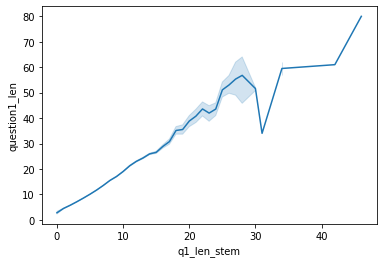

In [ ]:
sns.lineplot(x = dataset['q1_len_stem'], y = df['question1_len'])

### Joint Plot

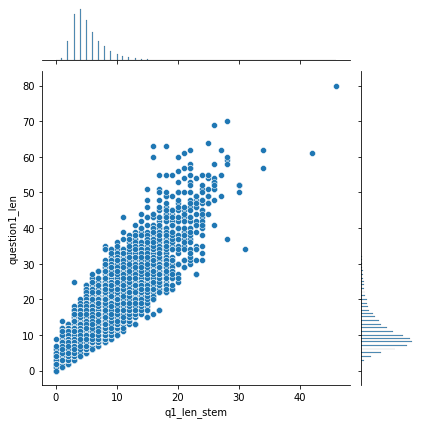

In [ ]:
sns.jointplot(x = dataset['q1_len_stem'], y = df['question1_len'])

### Swarm Plot

In [ ]:
#sns.swarmplot(x = dataset['q1_len_stem'], y = df['question1_len'],palette='Set2')

### Cat Plot

In [ ]:
# sns.catplot(x = dataset['q1_len_stem'], y = df['question1_len'], kind="boxen")


### Heat Map

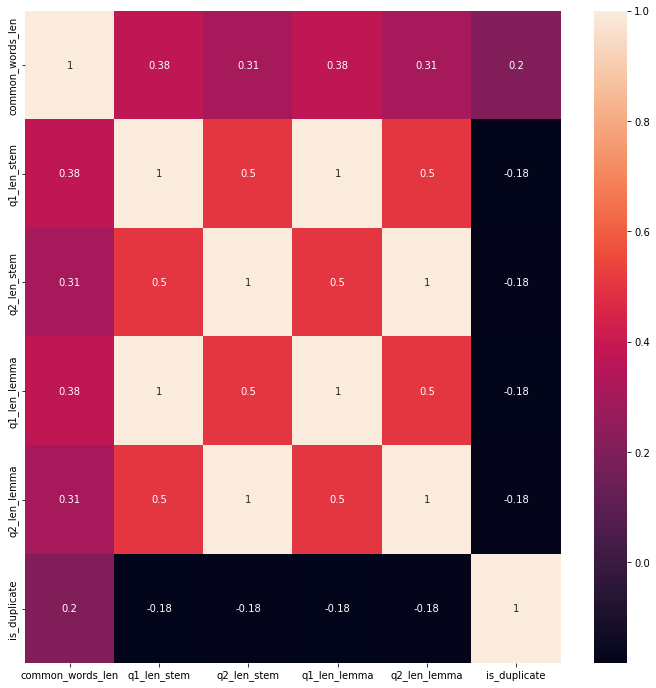

In [ ]:
plt.figure(figsize=(12,12))
corrMatrix1 = dq.corr()
sns.heatmap(corrMatrix1, annot=True)

In [ ]:
from scipy import stats
import statistics as st
import statsmodels.api as sm

### Word Cloud

#### For Question1

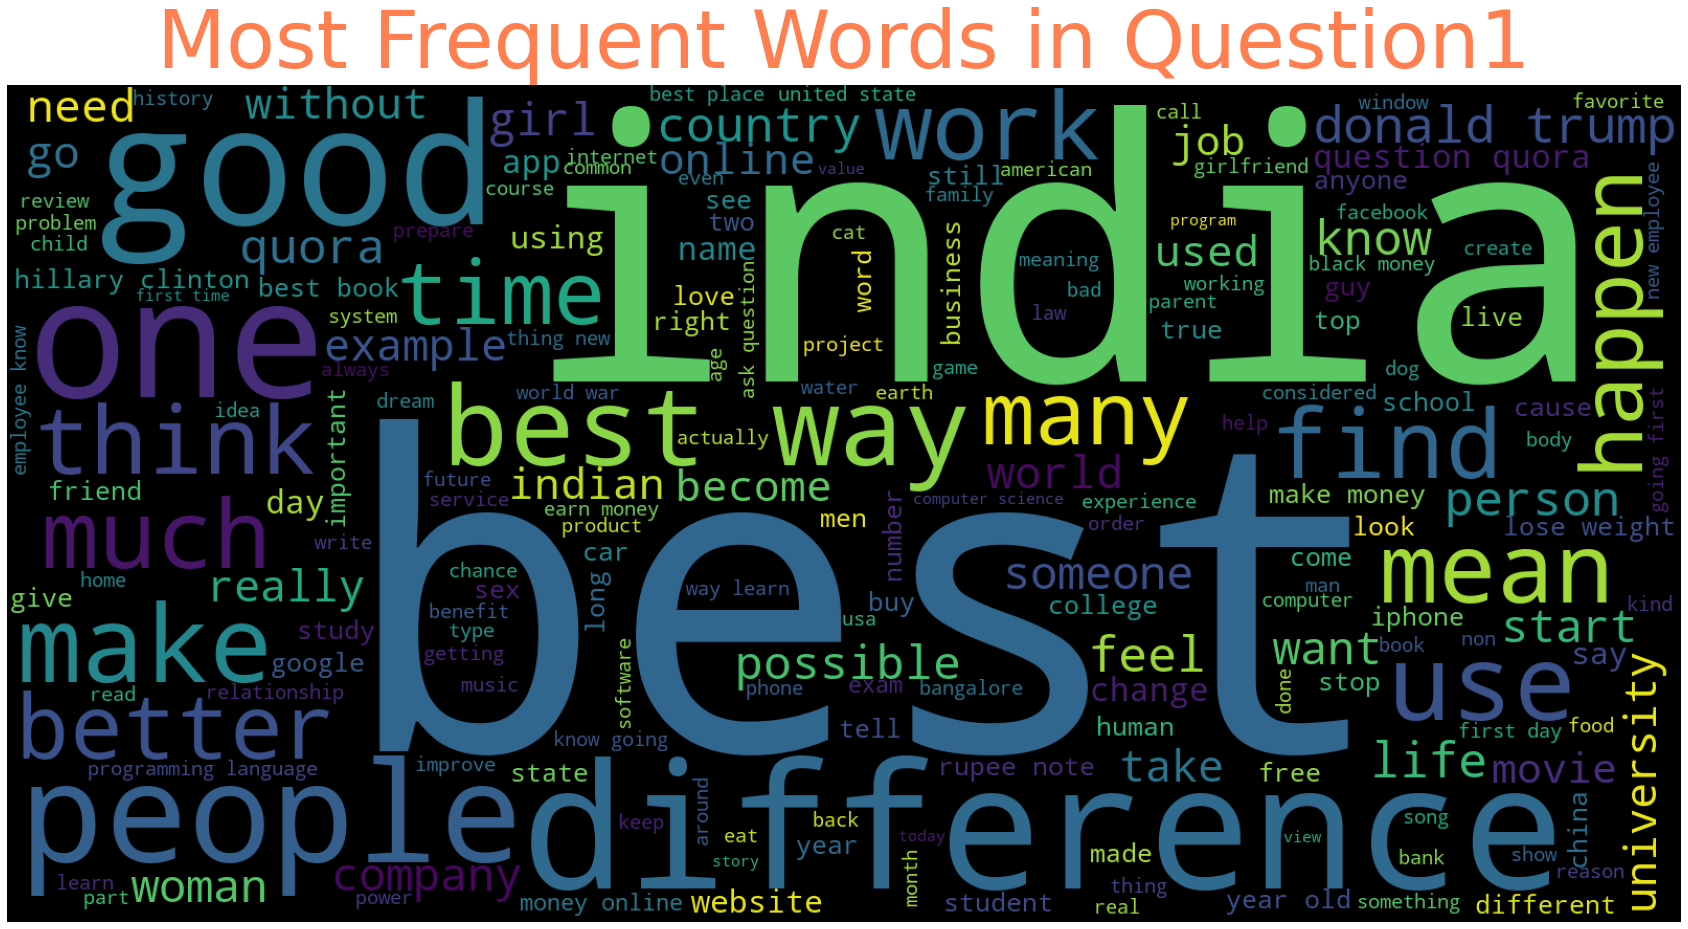

In [ ]:
words = ' '.join(dataset['q1_lemma'])
cleaned_word = " ".join([word for word in words.split()])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)
plt.figure(1,figsize=(30,20))
plt.title('Most Frequent Words in Question1',fontsize=80,color='coral')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### For Question2

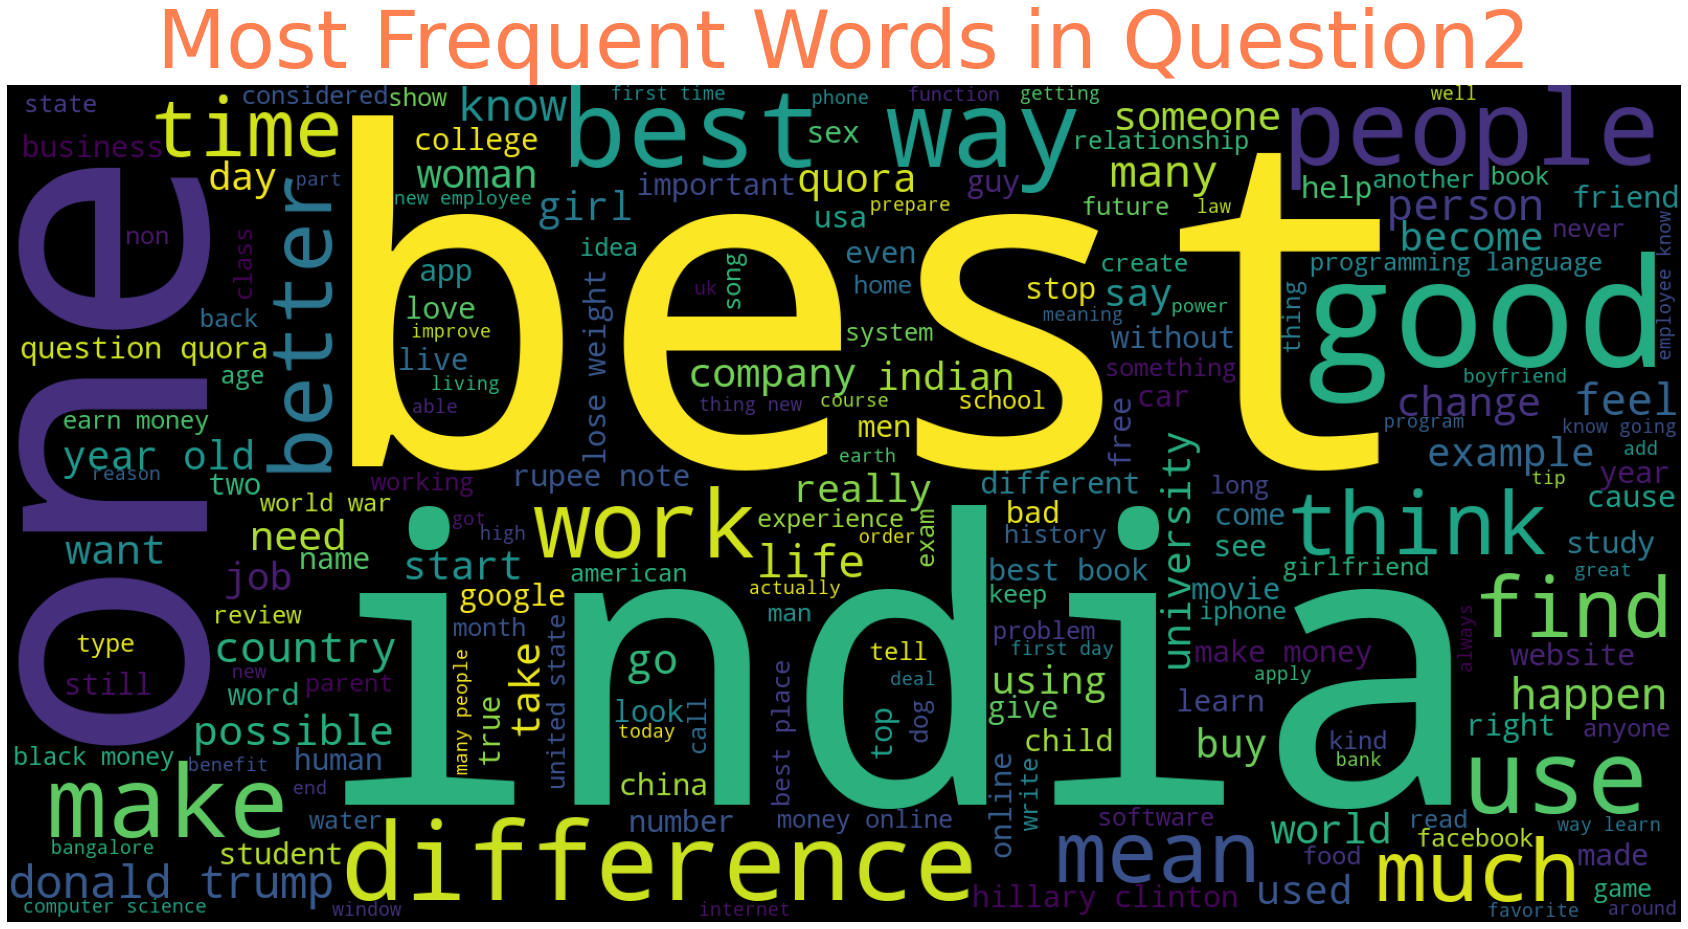

In [ ]:
words = ' '.join(dataset['q2_lemma'])
cleaned_word = " ".join([word for word in words.split()])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)
plt.figure(1,figsize=(30,20))
plt.title('Most Frequent Words in Question2',fontsize=80,color='coral')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Counting the sentences which are repeated more than 10 times.

### For Question1 

#### Lemmatization

In [ ]:
print('Total unique text :', dataset["q1_lemma"].nunique())

#dataset["q1_lemma"].value_counts()

Total unique text : 84602


In [ ]:
v = dataset["q1_lemma"].value_counts()
count = 0
for i in v:
    if i == 9:
        print('Number of sentences in q1_lemma column repeated more than 10 times are : ',count)
        break
    count = count + 1

Number of sentences in q1_lemma column repeated more than 10 times are :  97


#### Stemming

In [ ]:
print('Total unique text :', dataset["q1_stem"].nunique())

#dataset["q1_stem"].value_counts()

Total unique text : 84360


In [ ]:
v = dataset["q1_stem"].value_counts()
count = 0
for i in v:
    if i == 9:
        print('Number of sentences in q1_stem column repeated more than 10 times are : ',count)
        break
    count = count + 1

Number of sentences in q1_stem column repeated more than 10 times are :  108


**Observation:** Here the no of sentences in q1_stem and q1_lemma are both Different, Because lemmatization makes meaningful words.

### Question2

#### Lemmatization

In [ ]:
print('Total unique text :', dataset["q2_lemma"].nunique())

#dataset["q1_lemma"].value_counts()

Total unique text : 84948


In [ ]:
v = dataset["q2_lemma"].value_counts()
count = 0
for i in v:
    if i == 9:
        print('Number of sentences in q2_lemma column repeated more than 10 times are : ',count)
        break
    count = count + 1

Number of sentences in q2_lemma column repeated more than 10 times are :  125


#### Stemming

In [ ]:
print('Total unique text :', dataset["q1_stem"].nunique())

#dataset["q1_stem"].value_counts()

Total unique text : 84360


In [ ]:
v = dataset["q2_stem"].value_counts()
count = 0
for i in v:
    if i == 9:
        print('Number of sentences in q2_stem column repeated more than 10 times are : ',count)
        break
    count = count + 1

Number of sentences in q2_stem column repeated more than 10 times are :  132


# Checking for blank rows

In [ ]:
blank_rows = df[(df['q1_lemma'] == '') & (df['q2_lemma'] == '')]
blank_rows

,question1,question2,is_duplicate,question1_len,q1_stem,q1_len_stem,question2_len,q2_stem,q2_len_stem,q1_lemma,q1_len_lemma,q2_lemma,q2_len_lemma,common_words,common_words_len
3951,What is this?,o,0,3,,0,1,,0,,0,,0,,0
4683,To be or not to be?,"What is ""To be or not to be"" about?",0,6,,0,9,,0,,0,,0,,0
5376,What is 3-{3-3 [3-(3-3)]} /3 =?,What is 3+3*3+3?,0,2,,0,2,,0,,0,,0,,0
5760,What is 1+2?,What is 1/2+1/2?,0,2,,0,2,,0,,0,,0,,0
11960,What is 9 + 10 + 2?,What is 9 + 10?,0,2,,0,2,,0,,0,,0,,0
13685,Why isn't 0^0=1?,Why does 0! =1 and 1! =0?,0,3,,0,3,,0,,0,,0,,0
24296,What are we all doing?,What are we all about?,0,5,,0,5,,0,,0,,0,,0
37583,What is it that you are doing and why?,What are you doing? Why?,1,9,,0,5,,0,,0,,0,,0
38790,How is 0! = 1?,How is 0! =1?,1,2,,0,2,,0,,0,,0,,0
44622,What is 2^ (1/2!) ^ (1/3!) ^ (1/4!)^...?,What is 1+2?,0,2,,0,2,,0,,0,,0,,0


<p style='font-size:16px'>After Lemmatizing, we're having some blank rows, which are obviously not needed. So, we'll drop them.</p>

In [ ]:
df.drop(blank_rows.index, axis=0, inplace=True)
df.shape

(99984, 15)

# 4. Data Preparation 
<p style = 'font-size:15px'>Now prepare the data and build a baseline linear model</p>

In [ ]:
# Only keeping the necessary columns

ddf = df.loc[:, ['q1_lemma', 'q2_lemma', 'is_duplicate']]
ddf.head()

,q1_lemma,q2_lemma,is_duplicate
0,play pok mon go korea,play pok mon go china,0
1,best side dish crab cake,good side dish buffalo chicken,0
2,advisable better material crash test automobil...,best server setup buddypress,0
3,improve logical programming skill,improve logical skill programming,1
4,close see rd world war,close world war iii,1


In [ ]:
# Merging two question's columns, so that we can train the data efficiently

questions = ddf['q1_lemma'] + ' ' + ddf['q2_lemma']

ddf['questions'] = questions

ddf.head()

,q1_lemma,q2_lemma,is_duplicate,questions
0,play pok mon go korea,play pok mon go china,0,play pok mon go korea play pok mon go china
1,best side dish crab cake,good side dish buffalo chicken,0,best side dish crab cake good side dish buffal...
2,advisable better material crash test automobil...,best server setup buddypress,0,advisable better material crash test automobil...
3,improve logical programming skill,improve logical skill programming,1,improve logical programming skill improve logi...
4,close see rd world war,close world war iii,1,close see rd world war close world war iii


## Split the data into train-test

In [ ]:
data = ddf.loc[:, ['questions', 'is_duplicate']]
data.head()

,questions,is_duplicate
0,play pok mon go korea play pok mon go china,0
1,best side dish crab cake good side dish buffal...,0
2,advisable better material crash test automobil...,0
3,improve logical programming skill improve logi...,1
4,close see rd world war close world war iii,1


In [ ]:
from sklearn.model_selection import train_test_split
data=data.sample(n=20000)
X = data.drop('is_duplicate', axis=1)
y = data['is_duplicate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16000, 1) (16000,)
(4000, 1) (4000,)


In [ ]:
X_train_lemma = []
X_test_lemma = []

for i in X_train['questions']:
    X_train_lemma.append(i)
    

for i in X_test['questions']:
    X_test_lemma.append(i)

## Vector representation of the text data using Bag-Of-Words and TF-IDF Vectorizer<br>

### Bag-Of-Words
<p style='font-size:16px'>Bag of words is a NLP technique or a method of feature extraction with text data. It is a representation of text that describes the occurrence of words within a document. It just keep track of word counts and disregard the grammatical details and the word order. 
    <br><br>
    We are using <b>CountVectorizer()</b> function from <b>sklearn library</b> to easily implement the BoW model.</p>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(ngram_range=(1, 1))

train_bow_features = bow_vectorizer.fit_transform(X_train_lemma)

test_bow_features = bow_vectorizer.transform(X_test_lemma)

print('Length of the vocabulary list :', len(bow_vectorizer.vocabulary_))


Length of the vocabulary list : 15978


In [ ]:
bow_vec = pd.DataFrame(train_bow_features.toarray(), columns = bow_vectorizer.vocabulary_)

print("Shape : ", bow_vec.shape, '\n')

bow_vec.head()

Shape :  (16000, 15978) 



,pakistan,failed,terror,state,happen,declared,option,better,mechanical,engineering,iet,ahmedabad,university,ddu,one,amie,iete,issue,currently,faced,philippine,business,process,outsourcing,industry,possible,resolution,current,deuterium,exploration,meet,brit,toronto,area,irish,aussie,depth,grand,canyon,got,...,bolster,palpate,cardinality,recursion,tillerson,embolden,cornerback,circled,reliability,mongodb,cassandra,couchbase,cloning,gamers,osteria,trattoria,ppl,cnns,passcode,cyborg,heterogeneous,jetpens,kuru,toga,sscportal,matched,classify,subspecies,homo,sapiens,jacob,wohl,instal,roadrunner,bonsai,fiverr,codec,render,unanswered,settled
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<p style='font-size:16px'> By the '.vocabulary_', we are getting all the Vocabulary or Word list as per the n-grams. <br>
<b>ngram_range = (a, b) : </b>  a is the min & b is the max word length we want to include in the vocabulary list.</p>

In [ ]:
print("Total unique words :", len(bow_vectorizer.vocabulary_))

print("\nType of train_features:", type(train_bow_features))     

print("\nShape of input data :", train_bow_features.shape)

Total unique words : 15978

Type of train_features: <class 'scipy.sparse.csr.csr_matrix'>

Shape of input data : (16000, 15978)


<br><p style='font-size:16px'><b>CountVectorizer()</b> creates a Compressed Sparse Row matrix or csr_matrix, which contains more 0 values than non-zero values. Here 1 represents the occurance of the word and 0 elsewhere.
    <br>
    The benefit of using csr_matrix is, <b>Storage:</b> There are lesser non-zero elements than zeros and thus lesser memory will be used to store only those elements.</p><br>

### TF-IDF

<p style='font-size:16px'>TF-IDF stands for <b>“Term Frequency — Inverse Document Frequency”</b>. This measures the frequency of a word in a document. We generally compute a weight to each word which signifies the importance of the word in the document and corpus.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=True, ngram_range=(1, 1))

train_tfidf_features = tfidf_vectorizer.fit_transform(X_train_lemma)

test_tfidf_features = tfidf_vectorizer.transform(X_test_lemma)

print('Length of the vocabulary list :', len(tfidf_vectorizer.vocabulary_))

Length of the vocabulary list : 15978


In [ ]:
tfidf_vec_df = pd.DataFrame(train_tfidf_features.toarray(), columns = tfidf_vectorizer.vocabulary_)

tfidf_vec_df.head()

,pakistan,failed,terror,state,happen,declared,option,better,mechanical,engineering,iet,ahmedabad,university,ddu,one,amie,iete,issue,currently,faced,philippine,business,process,outsourcing,industry,possible,resolution,current,deuterium,exploration,meet,brit,toronto,area,irish,aussie,depth,grand,canyon,got,...,bolster,palpate,cardinality,recursion,tillerson,embolden,cornerback,circled,reliability,mongodb,cassandra,couchbase,cloning,gamers,osteria,trattoria,ppl,cnns,passcode,cyborg,heterogeneous,jetpens,kuru,toga,sscportal,matched,classify,subspecies,homo,sapiens,jacob,wohl,instal,roadrunner,bonsai,fiverr,codec,render,unanswered,settled
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# For Example - checking tf-idf score for a column

# tfidf_vec_df['anyone reply'].value_counts()

In [ ]:
print("Total unique words :", len(tfidf_vectorizer.vocabulary_))

print("\nType of train_features:", type(train_tfidf_features))     

print("\nShape of input data :", train_tfidf_features.shape)

Total unique words : 15978

Type of train_features: <class 'scipy.sparse.csr.csr_matrix'>

Shape of input data : (16000, 15978)


# Model Building using ML Algorithms 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics

 ## Linear Models
### Logistic Regression
#### <p style = 'color:#990000'> Hyperparameter Tuning using GridSearchCV </p>

In [ ]:
tune_parameters = [{'C': [0.4, 0.6, 0.5]}]

model_lr = GridSearchCV(LogisticRegression(), tune_parameters, scoring='accuracy')

# model_lr.fit(train_tfidf_features.toarray(), y_train)
model_lr.fit(train_bow_features.toarray(), y_train)

print("Best parameters set found on train set :")

print(model_lr.best_params_)
print(model_lr.best_estimator_)
print('\nBest score :', model_lr.best_score_)

# print('\nAccuracy :', model_lr.score(test_tfidf_features, y_test))
print('\nAccuracy :', model_lr.score(test_bow_features, y_test))

Best parameters set found on train set :
{'C': 0.4}
LogisticRegression(C=0.4, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Best score : 0.7084999999999999

Accuracy : 0.7065


### Prediction

In [ ]:
# y_test_pred = model_lr.predict(test_tfidf_features)
y_test_pred = model_lr.predict(test_bow_features)

temp_df = pd.DataFrame({'Questions': X_test_lemma, 'Actual': y_test, 'Predicted': y_test_pred})
temp_df.head(10)

,Questions,Actual,Predicted
90150,difference labrador golden retriever temperame...,0,1
21741,best whirlpool microwave oven repair center hy...,1,1
88178,take home salary california base salary nyc ta...,0,0
41440,facebook post make feel envious facebook post ...,1,0
81902,banquo reaction king duncan death macbeth comp...,0,0
9318,partner acknowledge event life feeling constan...,0,0
58807,quality graduate order survive competitive wor...,0,1
84360,control emotion action control emotion sadness,1,1
54506,upsc initial preparation prepare upsc prelim,1,1
80722,unknown fact mr bean comedy character unknown ...,1,0


In [ ]:
print('Actual :\n')
print(temp_df['Actual'].value_counts())
print('\nPredited :\n')
print(temp_df['Predicted'].value_counts())

# print('\nTotal Correctly Classified data :', sum(temp_df['Predicted']))
print('\nTotal Misclassified data :', abs(sum(temp_df['Actual']) - sum(temp_df['Predicted'])))

Actual :

0    2520
1    1480
Name: Actual, dtype: int64

Predited :

0    2764
1    1236
Name: Predicted, dtype: int64

Total Misclassified data : 244


#### Actual Vs Predicted

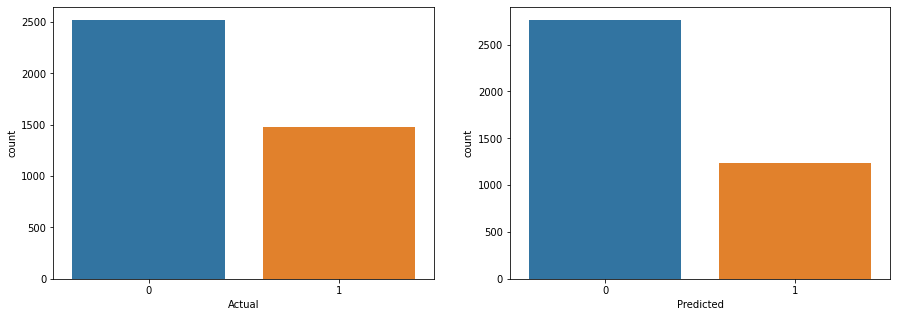

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(temp_df['Actual'], ax=ax[0])
sns.countplot(temp_df['Predicted'], ax=ax[1])
fig.show()

### Evaluation

In [ ]:
def Evaluate(y_test, y_test_pred):
    
    print('Accuracy :',round(metrics.accuracy_score(y_test, y_test_pred), 3))
    print('\nPrecision :', round(metrics.precision_score(y_test, y_test_pred), 3))
    print('\nRecall :', round(metrics.recall_score(y_test, y_test_pred), 3))
    print('\nF1_score :', round(metrics.f1_score(y_test, y_test_pred), 3))
    print('\nClassification Report :\n\n', classification_report(y_test, y_test_pred))

In [ ]:
Evaluate(y_test, y_test_pred)

Accuracy : 0.706

Precision : 0.624

Recall : 0.521

F1_score : 0.568

Classification Report :

               precision    recall  f1-score   support

           0       0.74      0.82      0.78      2520
           1       0.62      0.52      0.57      1480

    accuracy                           0.71      4000
   macro avg       0.68      0.67      0.67      4000
weighted avg       0.70      0.71      0.70      4000



## Tree Based Models
### Decision Tree Classifier
#### <p style = 'color:#990000'> With Hyperparameter Tuning </p>

In [ ]:
tune_parameters = [{'max_depth': [7, 9], 'min_samples_leaf': [4, 2, 3]}]

model_dt = GridSearchCV(DecisionTreeClassifier(), tune_parameters, scoring='accuracy')

model_dt.fit(train_bow_features.toarray(), y_train)
# model_dt.fit(train_tfidf_features.toarray(), y_train)

print("Best parameters set found on train set :")

print(model_dt.best_params_, '\n')
print(model_dt.best_estimator_)
print('\nBest score :', model_dt.best_score_)

# print('\nAccuracy :', model_dt.score(test_tfidf_features, y_test))
print('\nAccuracy :', model_dt.score(test_bow_features, y_test))

Best parameters set found on train set :
{'max_depth': 9, 'min_samples_leaf': 4} 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Best score : 0.6609375

Accuracy : 0.66325


#### Prediction

In [ ]:
# y_test_pred = model_dt.predict(test_tfidf_features)
y_test_pred = model_dt.predict(test_bow_features)

temp_df2 = pd.DataFrame({'Questions': X_test_lemma, 'Actual': y_test, 'Predicted': y_test_pred})

print('Actual :\n')
print(temp_df2['Actual'].value_counts())
print('\nPredicted :\n')
print(temp_df2['Predicted'].value_counts())

print('\nTotal Misclassified data :', abs(sum(temp_df2['Actual']) - sum(temp_df2['Predicted'])))

Actual :

0    2520
1    1480
Name: Actual, dtype: int64

Predicted :

0    3683
1     317
Name: Predicted, dtype: int64

Total Misclassified data : 1163


#### Actual Vs Predicted

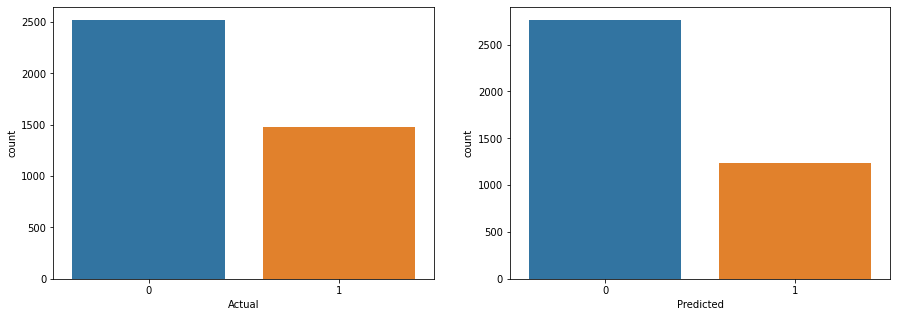

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(temp_df['Actual'], ax=ax[0])
sns.countplot(temp_df['Predicted'], ax=ax[1])
fig.show()

#### Evaluation

In [ ]:
Evaluate(y_test, y_test_pred)

Accuracy : 0.663

Precision : 0.71

Recall : 0.152

F1_score : 0.25

Classification Report :

               precision    recall  f1-score   support

           0       0.66      0.96      0.78      2520
           1       0.71      0.15      0.25      1480

    accuracy                           0.66      4000
   macro avg       0.68      0.56      0.52      4000
weighted avg       0.68      0.66      0.59      4000



## Random Forest Classifier
### <p style = 'color:#990000'>With Hyperparameter Tuning</p>

In [ ]:
tune_parameters = [{'n_estimators': [20, 30], 'max_depth': [3, 6, 4], 'min_samples_leaf': [2, 3, 4]}]

model_rf = GridSearchCV(RandomForestClassifier(), tune_parameters, scoring='accuracy')

# model_rf.fit(train_tfidf_features.toarray(), y_train)
model_rf.fit(train_bow_features.toarray(), y_train)

print("Best parameters set found on train set :")

print(model_rf.best_params_, '\n')
print(model_rf.best_estimator_)
print('\nBest score :', model_rf.best_score_)

# print('\nAccuracy :', model_rf.score(test_tfidf_features, y_test))
print('\nAccuracy :', model_rf.score(test_bow_features, y_test))

Best parameters set found on train set :
{'max_depth': 6, 'min_samples_leaf': 2, 'n_estimators': 20} 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Best score : 0.6280000000000001

Accuracy : 0.6315


#### Prediction

In [ ]:
# y_test_pred = model_dt.predict(test_tfidf_features)
y_test_pred = model_rf.predict(test_bow_features)

temp_df3 = pd.DataFrame({'Questions': X_test_lemma, 'Actual': y_test, 'Predicted': y_test_pred})

print('Actual :\n')
print(temp_df3['Actual'].value_counts())
print('\nPredicted :\n')
print(temp_df3['Predicted'].value_counts())

print('\nTotal Misclassified data :', abs(sum(temp_df3['Actual']) - sum(temp_df3['Predicted'])))

Actual :

0    2520
1    1480
Name: Actual, dtype: int64

Predicted :

0    3994
1       6
Name: Predicted, dtype: int64

Total Misclassified data : 1474


#### Actual Vs Predicted

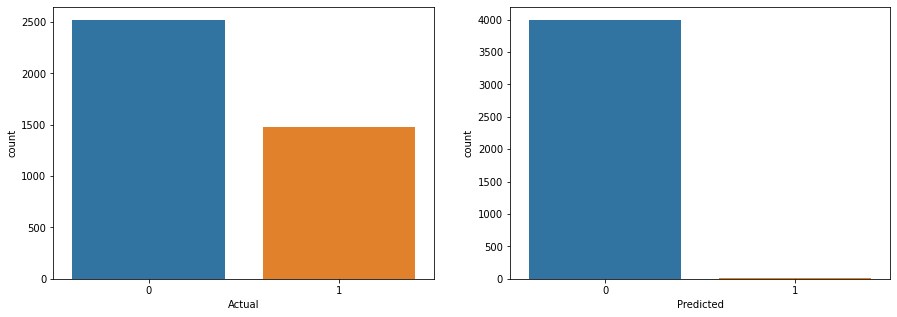

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(temp_df3['Actual'], ax=ax[0])
sns.countplot(temp_df3['Predicted'], ax=ax[1])
fig.show()

#### Evaluation

In [ ]:
Evaluate(y_test, y_test_pred)

Accuracy : 0.632

Precision : 1.0

Recall : 0.004

F1_score : 0.008

Classification Report :

               precision    recall  f1-score   support

           0       0.63      1.00      0.77      2520
           1       1.00      0.00      0.01      1480

    accuracy                           0.63      4000
   macro avg       0.82      0.50      0.39      4000
weighted avg       0.77      0.63      0.49      4000



# Model Comparision

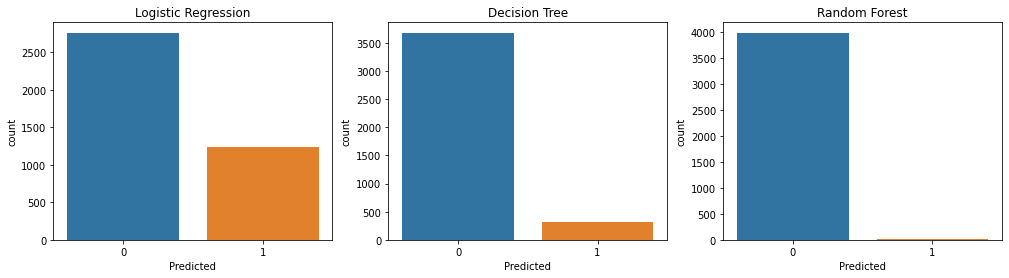

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(17,4))
sns.countplot(temp_df['Predicted'], ax=ax[0]).set_title('Logistic Regression')
sns.countplot(temp_df2['Predicted'], ax=ax[1]).set_title('Decision Tree')
sns.countplot(temp_df3['Predicted'], ax=ax[2]).set_title('Random Forest')

fig.show()

It's showing, among all these the models, **Logistic Regression** model is giving the **Best Prediction**.

# Prediction with User-input
Using 'pickle' library to save the model

In [ ]:
from pickle import dump

# dump(tfidf_vectorizer, open('tfidf_vectorizer.pkl', 'wb'))
dump(bow_vectorizer, open('countvectorizer.pkl', 'wb'))

dump(model_lr, open('logreg_model.pkl', 'wb'))

In [ ]:
from pickle import load

def predict(question_1, question_2):
    
    # Load the tf-idf vectorizer from pickle file
    vectorizer = load(open('countvectorizer.pkl', 'rb'))    
#     vectorizer = load(open('tfidf_vectorizer.pkl', 'rb'))    
    
    # Load the classifier from pickle file
    classifier = load(open('logreg_model.pkl', 'rb'))
    
    #Preprocess the questions
    preprocess(question_1, 'lemma')
    preprocess(question_2, 'lemma')
    
    input_data = " ".join(q_word_lst)
    print([input_data])
    
    # Convert text into vector
    numeric_data = vectorizer.transform([input_data])
       
    # Prediction
    prediction = classifier.predict(numeric_data)
    
    return prediction

In [ ]:
question_1 = input("Enter 1st Question :")
question_2 = input("Enter 2nd Question :")

q_word_lst = []

pred = predict(question_1, question_2)
print(pred)

Enter 1st Question :how to play tennis
Enter 2nd Question :how to play cricket
['play tennis play cricket']
[0]


In [ ]:
question_1 = input("Enter 1st Question :")
question_2 = input("Enter 2nd Question :")

q_word_lst = []

pred = predict(question_1, question_2)
print(pred)

Enter 1st Question :i like icecream
Enter 2nd Question :icecream is my favourite
['like icecream icecream favourite']
[1]
